In [38]:
import matplotlib.pyplot as plt
import math
import numpy as np
from numpy import arange, array
from numpy.linalg import inv,solve

In [39]:
def initial_func(x,c, L, decayL):
  for i in range(0,len(x)):
     dis = abs(x[i] - L/2)
     c[i] = math.exp(-dis/decayL)
  
  return c

In [40]:
def mass(c,dx):
    """
    Computes mass at a particular time step 
    """

    # integrate the concentration over the domain
    mass = 0
    for i in range (1,len(c)-1):
        mass = mass + c[i]*dx
    
    mass = mass + c[0]*dx/2 + c[len(c)-1]*dx/2

    return mass

In [41]:
def solve_c_mass(v, dx, dt, N, D, L, n):
    # define auxiliary variables
    sigma = D*dt/(dx*dx)
    lmda = v*dt/dx

    x = arange(0.0,L+dx,dx)
    c0 = np.zeros_like(x)

    #initialize right side
    b = np.zeros_like(x)
    decayL = L/8
    initial_func(x,c0,L,decayL)

    s = (N+1,N+1)
    Amat = np.zeros(s)

    #set up first and last rows
    Amat[0,0] = -D/dx - v
    Amat[0,1] = D/dx

    Amat[N,N-1] = -D/dx - v
    Amat[N,N] = D/dx

    #diffusive piece
    for i in range (1,len(Amat)-1):
        Amat[i,i] = 2*sigma - lmda + 1
        Amat[i,i-1] = -sigma
        Amat[i,i+1] = -sigma + lmda

    #initialize b
    for i in range (1,len(c0)-1):
        b[i] = c0[i]

    #initialize c
    c = np.zeros_like(x)

    t = 0
    tsteps = np.zeros(n+1)

    #store initial mass
    initial_m = mass(c0,dx)

    for k in range (1,n+1):
        t = t + dt
        tsteps[k] = t
        c = solve(Amat,b)

        for i in range (1,len(c)-1):
            b[i] = c[i]    

    final_m = mass(c,dx)
    
    return initial_m, final_m

In [42]:
#diffusion constant
D = 1000

#time steps
n = 1000
Tfinal = 1.0
dt = Tfinal/n

# domain
L = 100.0

### change parameters here
v = 10
N_list = [100]

for N in N_list:
    dx = L/N
    print("dx = ", dx)
    print(initial_m)
    print(final_m)
    initial_m, final_m = solve_c_mass(v, dx, dt, N, D, L, n)
    print("rel error (%) = ", abs(final_m - initial_m)/initial_m * 100, "%")
    print("")

dx =  1.0
24.542239918890164
23.21003250376308
rel error (%) =  0.91919324231313 %



In [46]:
#diffusion constant
D = 1000

#time steps
n = 1000
Tfinal = 1.0
dt = Tfinal/n

# domain
L = 100.0

### change parameters here
v = 100
N_list = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
rel_err_list = []

for N in N_list:
    dx = L/N
    print("dx = ", dx)
    # print(initial_m)
    # print(final_m)
    initial_m, final_m = solve_c_mass(v, dx, dt, N, D, L, n)
    rel_err = abs(final_m - initial_m)/initial_m * 100
    rel_err_list.append(rel_err)
        # if error is less than 2 percent, break
    if rel_err < 2:
        break
    print("rel error (%) = ", rel_err, "%")
    print("")


dx =  0.2
rel error (%) =  10.413372308091686 %

dx =  0.1
rel error (%) =  5.428222605311926 %

dx =  0.06666666666666667
rel error (%) =  3.6704198340590155 %

dx =  0.05
rel error (%) =  2.77251662984471 %

dx =  0.04
rel error (%) =  2.227561459260509 %

dx =  0.03333333333333333


In [62]:
print("N_list = ", N_list[:len(rel_err_list)])
dx_list = [L/N for N in N_list[:len(rel_err_list)]]
print("dx_list = ", dx_list)
print("rel_err_list = ", rel_err_list)

N_list =  [500, 1000, 1500, 2000, 2500, 3000]
dx_list =  [0.2, 0.1, 0.06666666666666667, 0.05, 0.04, 0.03333333333333333]
rel_err_list =  [10.413372308091686, 5.428222605311926, 3.6704198340590155, 2.77251662984471, 2.227561459260509, 1.861637785934784]


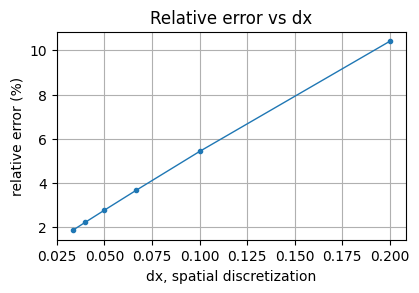

In [63]:
# plot a graph of the relative error vs dx
plt.figure(figsize = (4.5, 2.7))
plt.plot(dx_list, rel_err_list, 'o-', markersize = 3, linewidth = 1)
plt.xlabel("dx, spatial discretization")
plt.ylabel("relative error (%)")
plt.title("Relative error vs dx")
plt.grid(True)

In [65]:
def solve_c_mass(v, dx, dt, N, D, L, n):
    # define auxiliary variables
    sigma = D*dt/(dx*dx)
    lmda = v*dt/dx

    x = arange(0.0,L+dx,dx)
    c0 = np.zeros_like(x)

    #initialize right side
    b = np.zeros_like(x)
    decayL = L/8
    initial_func(x,c0,L,decayL)

    s = (N+1,N+1)
    Amat = np.zeros(s)

    #set up first and last rows
    Amat[0,0] = -D/dx - v
    Amat[0,1] = D/dx

    Amat[N,N-1] = -D/dx - v
    Amat[N,N] = D/dx

    #diffusive piece
    for i in range (1,len(Amat)-1):
        Amat[i,i] = 2*sigma - lmda + 1
        Amat[i,i-1] = -sigma
        Amat[i,i+1] = -sigma + lmda

    #initialize b
    for i in range (1,len(c0)-1):
        b[i] = c0[i]

    #initialize c
    c = np.zeros_like(x)

    t = 0
    tsteps = np.zeros(n+1)

    #store initial mass
    initial_m = mass(c0,dx)

    for k in range (1,n+1):
        t = t + dt
        tsteps[k] = t
        c = solve(Amat,b)
        
        # for plotting
        if (k % 25) == 0:
            # plt.clf()
            plt.plot(x,c)
            # plt.suptitle("Time = %1.3f" % t)
        plt.grid(True)
        plt.xlabel("x")
        plt.ylabel("c")
        plt.xlim(0,100)
        # legend
        # plt.legend(loc = "upper right")

        for i in range (1,len(c)-1):
            b[i] = c[i]    

    final_m = mass(c,dx)
    
    return initial_m, final_m

dx =  1.0


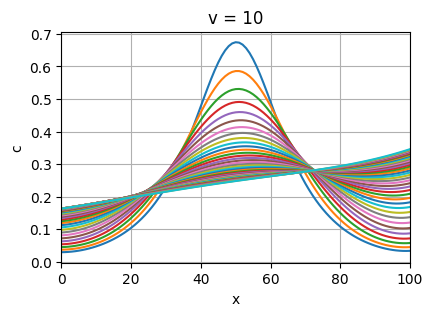

dx =  1.0


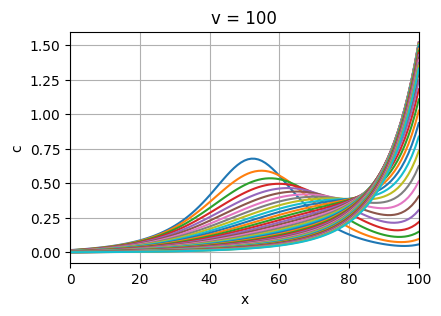

In [71]:
# we want to plot out to show the difference between the two cases

#diffusion constant
D = 1000

#time steps
n = 1000
Tfinal = 1.0
dt = Tfinal/n

# domain
L = 100.0

### change parameters here
v = 10
N = 100
dx = L/N
print("dx = ", dx)
plt.figure(figsize = (4.5, 3))
plt.title("v = 10")
initial_m, final_m = solve_c_mass(v, dx, dt, N, D, L, n)
plt.show()

### change parameters here
v = 100
N = 100
dx = L/N
print("dx = ", dx)
plt.figure(figsize = (4.5, 3))
plt.title("v = 100")
initial_m, final_m = solve_c_mass(v, dx, dt, N, D, L, n)
plt.show()

Yes, the mass evolution makes sense. We know that mass is supposed to be conserved at all timesteps. Plotting the concentration plot at every point, at every time step, we could clearly see the trend of concentration increasing in time closer to the right boundary, while concentration diffuses on the left end. It is observed that, at lower velocity, the peak isn't as sharp at the boundary, hence, we do not need much discretization (spatially) in order to get a good approximation by the trapezoidal rule (in this case <2 percent of error). On the other hand, we see that we do need a higher resolution, increase of number of elements (dx -> 0) for better approximation due to the sharp gradient (higher concentration of contaminant) at the right boundary.